[3.18615261e+00 1.36972684e+00 2.69624377e+00 3.78675130e+00
 2.70393657e+00 1.95573101e+00 3.71301741e+00 2.50524145e+00
 7.01621249e-01 2.64371665e+00 2.50917051e+00 6.66930644e-01
 2.46436387e+00 1.07759707e+00 1.12457778e+00 5.59916450e+00
 1.29113831e+00 3.02575145e+00 4.30525687e+00 1.52434628e+00
 1.76556975e+00 2.43446049e+00 4.58026976e-01 1.50500717e+00
 9.92272681e-01 5.90825429e-01 3.20577677e+00 5.00451907e+00
 3.75501259e+00 4.50122447e-02 0.00000000e+00 1.15086987e+00
 1.44991033e+00 1.54502327e+00 2.16002860e+00 1.25860341e-01
 3.19302823e+00 3.03178087e+00 3.57167867e+00 1.56298037e+00
 1.24336190e+00 4.18972545e+00 0.00000000e+00 2.41320980e+00
 4.84226396e+00 2.47210741e+00 2.48571107e+00 2.42242994e+00
 2.70266281e+00 2.20841458e+00 2.07045705e+00 5.17710746e+00
 1.65265355e+00 3.09115987e+00 1.35879435e+00 2.43287480e+00
 8.17660166e+00 2.07777437e+00 9.88106427e-01 5.70574035e+00
 1.29794057e+00 3.34134094e+00 4.46734927e+00 5.00349133e+00
 5.89421619e-01 8.510441

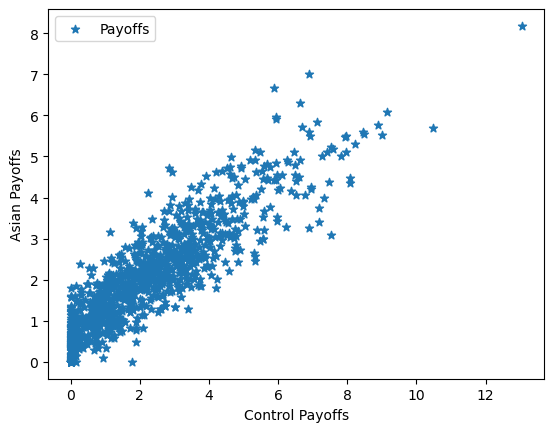

0.8892440566523486
Control variate price estimate
2.1448194624680683
Variance ratio of payoffs (varAsianPayoff/Var(Y))
4.779086540469454


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Inputs
n = 1000
T = 2
M = 5
sigma = 0.25
k = 4
r = 0.04
S0 = 6

# Simulation of GBM
Z = np.random.normal(0, 1, size=(n, M))
S = np.exp(
    np.cumsum((r - 0.5 * (sigma ** 2)) * (T / M) + sigma * np.sqrt(T / M) * Z, axis=1)
    + np.log(S0)
)

# Option payoffs
Asian_Payoffs = np.exp(-r * T) * np.maximum(np.mean(S, axis=1) - k, 0)
Control_Payoffs = np.exp(-r * T) * np.maximum(S[:, -1] - k, 0)
print(Asian_Payoffs)
print(Control_Payoffs)

# Estimate prices by crude Monte Carlo
Asian_PriceEst = np.mean(Asian_Payoffs)
Control_PriceEst = np.mean(Control_Payoffs)
print(Asian_PriceEst)

# Price est using control variate
#print('CMC price estimate')
print(Asian_PriceEst)

# Plots payoffs to show correlation
plt.scatter(Control_Payoffs, Asian_Payoffs, marker='*', label='Payoffs')
plt.xlabel('Control Payoffs')
plt.ylabel('Asian Payoffs')
plt.legend()
plt.show()

# Control mean (Calculated using Black-Scholes)
d1 = (1 / (sigma * np.sqrt(T))) * (np.log(S0 / k) + (r + 0.5 * sigma ** 2) * T)
d2 = d1 - sigma * np.sqrt(T)
Control_Mean = norm.cdf(d1) * S0 - norm.cdf(d2) * k * np.exp(-r * T)

# Calculates Y_i's
covariance = np.cov([Asian_Payoffs, Control_Payoffs], ddof=0)
alfa = -covariance[0, 1] / covariance[1, 1]
Y = Asian_Payoffs + alfa * (Control_Payoffs - Control_Mean)

# Prints correlation coefficient
#print('Correlation of payoffs')
rho = np.corrcoef(Asian_Payoffs, Control_Payoffs)[0, 1]
print(rho)

# Price est using control variate
print('Control variate price estimate')
print(np.mean(Y))

# Checks variances
print('Variance ratio of payoffs (varAsianPayoff/Var(Y))')
var_ratio = np.var(Asian_Payoffs) / np.var(Y)
print(var_ratio)
